# 07MIAR_Proyecto_Programación - Plant Seedlings Classification

## 1. Preparación de los datos

### 1.1 Cargamos los datos


In [30]:
from google.colab import drive
import json
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
from skimage import io
import numpy as np
from concurrent.futures import ThreadPoolExecutor, as_completed

In [1]:
# Conectamos con nuestro Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Establezco una ruta absoluta a un directorio existente de mi Google Drive
BASE_FOLDER = "/content/drive/MyDrive/BASE_FOLDER/"

### 1.2 Examinos los datos

In [8]:
# Abre el archivo JSON en modo lectura
with open(f'{BASE_FOLDER}/my_dataset/etiquetas.json', 'r') as f:
    # Lee el contenido del archivo
    contenido = f.read()

    # Carga el contenido en un objeto Python
    diccionario_imagenes = json.loads(contenido)

# Ahora datos es un diccionario que contiene la información del archivo JSON
print(diccionario_imagenes)

{'/content/drive/MyDrive/BASE_FOLDER/my_dataset/train/Black-grass/05eedce4d.png': 'Black-grass', '/content/drive/MyDrive/BASE_FOLDER/my_dataset/train/Black-grass/0183fdf68.png': 'Black-grass', '/content/drive/MyDrive/BASE_FOLDER/my_dataset/train/Black-grass/0260cffa8.png': 'Black-grass', '/content/drive/MyDrive/BASE_FOLDER/my_dataset/train/Black-grass/0050f38b3.png': 'Black-grass', '/content/drive/MyDrive/BASE_FOLDER/my_dataset/train/Black-grass/082314602.png': 'Black-grass', '/content/drive/MyDrive/BASE_FOLDER/my_dataset/train/Black-grass/075d004bc.png': 'Black-grass', '/content/drive/MyDrive/BASE_FOLDER/my_dataset/train/Black-grass/078eae073.png': 'Black-grass', '/content/drive/MyDrive/BASE_FOLDER/my_dataset/train/Black-grass/0ace21089.png': 'Black-grass', '/content/drive/MyDrive/BASE_FOLDER/my_dataset/train/Black-grass/0b3e7a7a9.png': 'Black-grass', '/content/drive/MyDrive/BASE_FOLDER/my_dataset/train/Black-grass/0bb75ded8.png': 'Black-grass', '/content/drive/MyDrive/BASE_FOLDER/my_

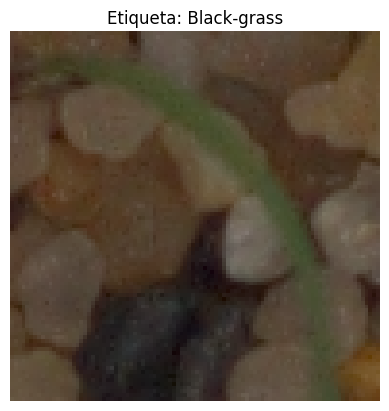

In [11]:
imagen = Image.open(list(diccionario_imagenes)[200])
plt.imshow(imagen)
plt.title(f"Etiqueta: {diccionario_imagenes[list(diccionario_imagenes)[0]]}")
plt.axis("off")
plt.show()

In [32]:
#random_image = next(iter(diccionario_imagenes.keys()))
#image = io.imread(random_image)
#image_norm = image / np.max(image)
#image_norm.shape

"""
x_train = []
y_train = list(diccionario_imagenes.values())

# Recorre el diccionario, carga cada imagen, y la añade a x_train
for imagen_path in diccionario_imagenes.keys():
    with Image.open(imagen_path) as img:
        img_array = np.array(img)
        x_train.append(img_array)
"""


# Función para cargar una imagen y convertirla a un array de numpy
def cargar_imagen(path):
    print(f"Cargando {path}...")
    with Image.open(path) as img:
        img_array = np.array(img)
    print(f"Finalizada carga de {path}")
    return img_array, diccionario_imagenes[path]

# Lista para almacenar los resultados (tuplas de array de imagen y etiqueta)
resultados = []

# Utiliza ThreadPoolExecutor para paralelizar la carga de imágenes
with ThreadPoolExecutor(max_workers=8) as executor:
    # Crea un futuro para cada archivo de imagen
    future_to_image = {executor.submit(cargar_imagen, path): path for path in diccionario_imagenes.keys()}
    total_imagenes = len(future_to_image)
    imagenes_procesadas = 0

    for future in as_completed(future_to_image):
        try:
            img_array, etiqueta = future.result()
            resultados.append((img_array, etiqueta))
            imagenes_procesadas += 1
            print(f"Progreso: {imagenes_procesadas}/{total_imagenes} imágenes procesadas.")
        except Exception as exc:
            print(f'Hubo una excepción para {future_to_image[future]}: {exc}')

# Separa los resultados en x_train e y_train
x_train = [resultado[0] for resultado in resultados]
y_train = [resultado[1] for resultado in resultados]

print("Procesamiento completado.")

Se han truncado las últimas 5000 líneas del flujo de salida.
Finalizada carga de /content/drive/MyDrive/BASE_FOLDER/my_dataset/train/Maize/eefba9376.png
Cargando /content/drive/MyDrive/BASE_FOLDER/my_dataset/train/Maize/e43323e28.png...
Progreso: 3082/4750 imágenes procesadas.
Finalizada carga de /content/drive/MyDrive/BASE_FOLDER/my_dataset/train/Maize/f34429b11.png
Cargando /content/drive/MyDrive/BASE_FOLDER/my_dataset/train/Maize/d3cf21397.png...
Progreso: 3083/4750 imágenes procesadas.
Finalizada carga de /content/drive/MyDrive/BASE_FOLDER/my_dataset/train/Maize/cd2b68ba2.png
Cargando /content/drive/MyDrive/BASE_FOLDER/my_dataset/train/Maize/f5e10e5ec.png...
Progreso: 3084/4750 imágenes procesadas.
Finalizada carga de /content/drive/MyDrive/BASE_FOLDER/my_dataset/train/Maize/e45f92ca7.png
Cargando /content/drive/MyDrive/BASE_FOLDER/my_dataset/train/Maize/f2c22a1bf.png...
Progreso: 3085/4750 imágenes procesadas.
Finalizada carga de /content/drive/MyDrive/BASE_FOLDER/my_dataset/train

In [45]:
# Hacemos el OHE

#Crear un diccionario con las listas
data = {'imagen': x_train, 'etiqueta': y_train}
df = pd.DataFrame(data)

df_encoded = pd.get_dummies(df, columns=['etiqueta'])

,imagen,etiqueta_Black-grass,etiqueta_Charlock,etiqueta_Cleavers,etiqueta_Common Chickweed,etiqueta_Common wheat,etiqueta_Fat Hen,etiqueta_Loose Silky-bent,etiqueta_Maize,etiqueta_Scentless Mayweed,etiqueta_Shepherds Purse,etiqueta_Small-flowered Cranesbill,etiqueta_Sugar beet
0,"[[[96, 75, 45], [95, 75, 49], [91, 71, 47], [8...",True,False,False,False,False,False,False,False,False,False,False,False
1,"[[[80, 50, 27], [71, 42, 18], [83, 57, 36], [8...",True,False,False,False,False,False,False,False,False,False,False,False
2,"[[[77, 51, 22], [74, 48, 24], [67, 40, 20], [6...",True,False,False,False,False,False,False,False,False,False,False,False
3,"[[[63, 65, 45], [65, 65, 46], [65, 65, 45], [6...",True,False,False,False,False,False,False,False,False,False,False,False
4,"[[[45, 32, 24], [44, 30, 21], [45, 30, 22], [4...",True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,"[[[122, 102, 74], [129, 111, 84], [113, 93, 65...",False,False,False,False,False,False,False,False,False,False,False,True
4746,"[[[95, 75, 56], [96, 79, 60], [98, 82, 64], [1...",False,False,False,False,False,False,False,False,False,False,False,True
4747,"[[[105, 91, 73], [105, 91, 72], [103, 88, 67],...",False,False,False,False,False,False,False,False,False,False,False,True
4748,"[[[145, 141, 144], [143, 139, 143], [146, 142,...",False,False,False,False,False,False,False,False,False,False,False,True


In [47]:
# Guardamos los resultados en un archivo .csv
df_encoded.to_csv(BASE_FOLDER+"my_dataset/ohe_data_train.csv", index=False)